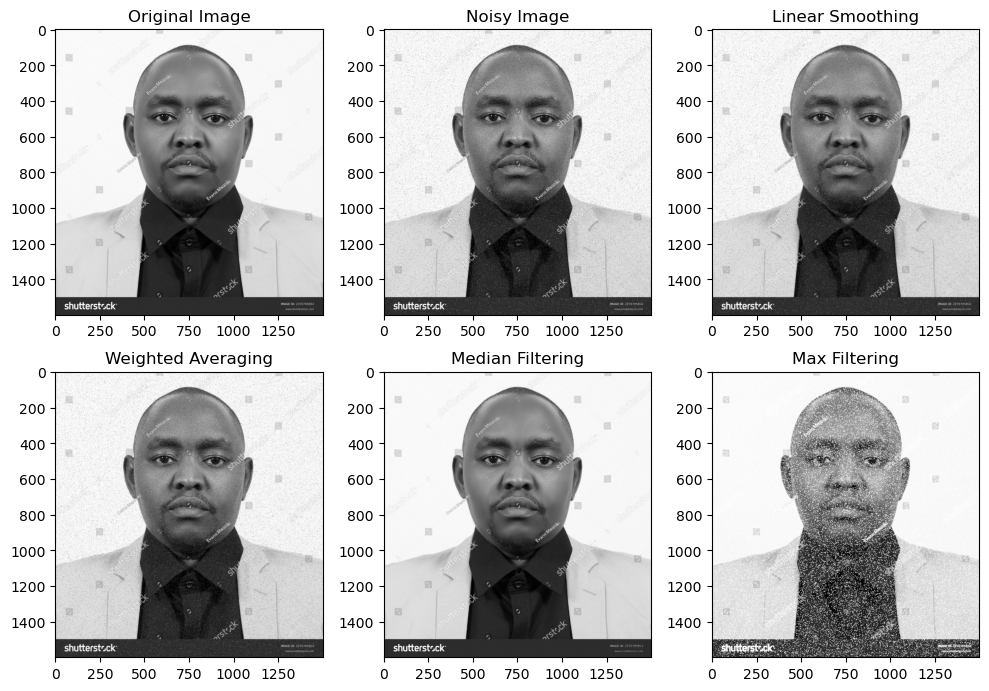

In [1]:
#Take a grayscale image and add salt and pepper noise. Write programs for following operations and observe their outputs 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0
    return noisy_image

image = cv2.imread(r"D:\Avinash\Digital-Image-Preprocessing\assets\one.jpg", cv2.IMREAD_GRAYSCALE)
noisy_image = add_salt_and_pepper_noise(image, 0.02, 0.02)
#Linear smoothing or Image averaging
linear_smoothing = cv2.blur(noisy_image, (3, 3))
#Weighted averaging
weighted_averaging = cv2.GaussianBlur(noisy_image, (3, 3), 0)
#Median filtering. Compare the output quality among Image averaging and median filtering.
median_filtered = cv2.medianBlur(noisy_image, 3)

kernel = np.ones((3, 3), np.uint8)
#Max filtering
max_filtered = cv2.dilate(noisy_image, kernel)
#Min filtering
min_filtered = cv2.erode(noisy_image, kernel)

plt.figure(figsize=(10, 7))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title("Noisy Image")
plt.subplot(2, 3, 3), plt.imshow(linear_smoothing, cmap='gray'), plt.title("Linear Smoothing")
plt.subplot(2, 3, 4), plt.imshow(weighted_averaging, cmap='gray'), plt.title("Weighted Averaging")
plt.subplot(2, 3, 5), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtering")
plt.subplot(2, 3, 6), plt.imshow(max_filtered, cmap='gray'), plt.title("Max Filtering")
plt.tight_layout()
plt.show()